# Quantam Computing

This tutorial shows how to create a quantum circuit in python using `qiskit` package. We will apply the Pauli-X Gate on qubit to demonstrate the QC.

In [ ]:
!pip install numpy

In [ ]:
!pip install qiskit

In [ ]:
!pip install pylatexenc

### Bloch Sphere & Notation
![Bloch Sphere](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.jfO3t2Gt2wfTdA7YCDOtEAHaGt%26pid%3DApi&f=1)

## Implementing a Quantum circit using quantum simulator

In [ ]:
import numpy

In [ ]:
x_gate = numpy.array([[0, 1], [1, 0]])
x_gate

array([[0, 1],
       [1, 0]])

In [ ]:
ket0 = numpy.array([[1], [0]])
ket0

array([[1],
       [0]])

In [ ]:
ket1 = numpy.dot(x_gate, ket0)
ket1

array([[0],
       [1]])

In [ ]:
ket0 = numpy.dot(x_gate, ket1)
ket0

array([[1],
       [0]])

In [ ]:
import qiskit

%matplotlib inline

In [ ]:
circuit = qiskit.QuantumCircuit(3, # number of qubits,
                                1 # number of classical bits
                                )
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 1/

In [ ]:
help( circuit.x )

Help on method x in module qiskit.circuit.quantumcircuit:

x(qubit: Union[qiskit.circuit.quantumregister.Qubit, qiskit.circuit.quantumregister.QuantumRegister, int, slice, Sequence[Union[qiskit.circuit.quantumregister.Qubit, int]]], label: Union[str, NoneType] = None) -> qiskit.circuit.instructionset.InstructionSet method of qiskit.circuit.quantumcircuit.QuantumCircuit instance
    Apply :class:`~qiskit.circuit.library.XGate`.
    
    For the full matrix form of this gate, see the underlying gate documentation.
    
    Args:
        qubit: The qubit(s) to apply the gate to.
        label: The string label of the gate in the circuit.
    
    Returns:
        A handle to the instructions created.



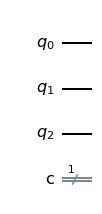

In [ ]:
# Drawing a circuit using matplotlib
circuit.draw(output='mpl')

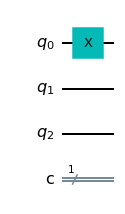

In [ ]:
# this method applied Pauli-X Gate to qubit
circuit.x(0)
circuit.draw(output='mpl')

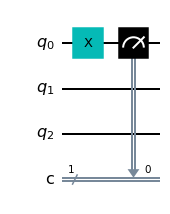

In [ ]:
circuit.measure(0, 0)
circuit.draw(output='mpl')

In [ ]:
# This function list the quantum simulators available
qiskit.Aer.aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [ ]:
simulator = qiskit.Aer.aer.get_backend('qasm_simulator')

In [ ]:
job_result = qiskit.execute(circuit, simulator, shots=100).result()

In [ ]:
job_result

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='7b026af7-9a15-4c09-81ec-7d9408daab78', job_id='e2ce05e3-a588-42db-835c-a1092565c1dc', success=True, results=[ExperimentResult(shots=100, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 100}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=3, name='circuit-6', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=1424462676, metadata={'parallel_state_update': 2, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 1, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0], 'num_clbits': 1, 'input_qubit_map': [[0, 0]], 'fusion': {'enabled': False}}, time_taken=0.0002717)], date=2022-04-30T16:42:13.695324, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator',

In [ ]:
job_result.get_counts(circuit)

{'1': 100}

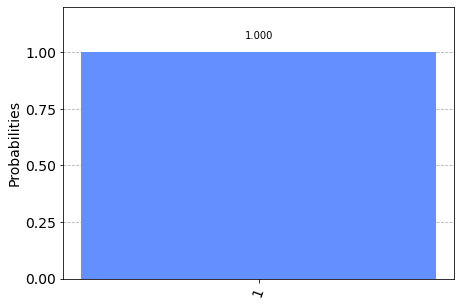

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(job_result.get_counts(circuit))

## Implementing a Quantum circit using real Quantum device

In [ ]:
from qiskit import *

In [ ]:
with open("drive/MyDrive/qc.token") as fp:
  IBMQ.ibmq.save_account(fp.read(), overwrite=True)

In [ ]:
IBMQ.ibmq.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
IBMQ.ibmq.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
provider = IBMQ.ibmq.get_provider('ibm-q')

In [ ]:
# Returns the list of backends available in the given provider
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [ ]:
property_names = ["Name", "Remaining Jobs", "Backend Version", "Last Update Date"]
for backend in provider.backends():
    properties = backend.properties()
    jobs_count = backend.remaining_jobs_count()
    if backend.properties() is not None:
        property_list = [properties.backend_name, jobs_count, properties.backend_version, properties.last_update_date]
        print(" | ".join(map(lambda v: "{0}: {1}".format(v[0],v[1]), zip(property_names, property_list))))
        print(properties.to_dict())


Name: ibmq_armonk | Remaining Jobs: 5 | Backend Version: 2.4.34 | Last Update Date: 2022-04-30 04:07:19+00:00
{'backend_name': 'ibmq_armonk', 'backend_version': '2.4.34', 'last_update_date': datetime.datetime(2022, 4, 30, 4, 7, 19, tzinfo=tzlocal()), 'qubits': [[{'date': datetime.datetime(2022, 4, 30, 4, 4, 13, tzinfo=tzlocal()), 'name': 'T1', 'unit': 'us', 'value': 151.59775260507135}, {'date': datetime.datetime(2022, 4, 30, 4, 4, 37, tzinfo=tzlocal()), 'name': 'T2', 'unit': 'us', 'value': 222.29016457859967}, {'date': datetime.datetime(2022, 4, 30, 4, 7, 19, tzinfo=tzlocal()), 'name': 'frequency', 'unit': 'GHz', 'value': 4.971679107034033}, {'date': datetime.datetime(2022, 4, 30, 4, 7, 19, tzinfo=tzlocal()), 'name': 'anharmonicity', 'unit': 'GHz', 'value': -0.34719293148282626}, {'date': datetime.datetime(2022, 4, 30, 4, 3, 33, tzinfo=tzlocal()), 'name': 'readout_error', 'unit': '', 'value': 0.03839999999999999}, {'date': datetime.datetime(2022, 4, 30, 4, 3, 33, tzinfo=tzlocal()), 'n

In [ ]:
quantum_computer = provider.get_backend('ibmq_santiago')
quantum_computer

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
quantum_computer.properties()

In [ ]:
circuit = QuantumCircuit(1, 1)

In [ ]:
circuit.x(0)
circuit.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

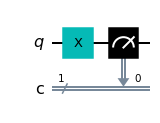

In [ ]:
circuit.measure(0, 0)
circuit.draw(output='mpl')

In [ ]:
import qiskit.tools.jupyter

%qiskit_job_watcher
result = execute(experiments=circuit, backend=quantum_computer, shots=100).result()

In [ ]:
result

In [ ]:
result.get_counts()

In [ ]:
plot_histogram(result.get_counts())

91

## Hadamard Gate


In [ ]:
circuit.h(0)
circuit.draw(otuput='mpl')

## Exercises

- Implement addition and subtraction of two numbers using quantum circuit/gates.
- Implement addition and subtraction of two integers using quantum circuit/gates.



<details>
  <summary> Solution 1 </summary>
  <p> Code </p>
</details>

<details>
  <summary> Solution 2 </summary>
  <p> Code </p>
</details>


In [ ]:
import qiskit